#### Employee Classification Prediction

- This dataset contains synthetic data for employee attrition
- The data was generated to simulate a scenario where various factors influence whether an employee stays with a company or leaves.
- This dataset can be used for predictive modeling, data analysis, and machine learning tasks related to employee turnover

#### Columns:

1. Employee_ID - Unique identifier for each employee
2. Age - Age of the employee.
3. Gender - Gender of employee(Male/Female)
4. Department - Department where the employee works (Sales, Marketing, Engineering, Finance, HR).
5. Job_Title - Job title of the employee (Manager, Analyst, Engineer, Accountant, HR Specialist).
6. Years_at_Company - Number of years the employee has been with the company.
7. Satisfaction_Level - Satisfaction level of the employee (ranging from 0 to 1).
8. Average_Monthly_Hours - Average number of hours worked per month.
9. Promotion_Last_5Years - Whether the employee was promoted in the last 5 years (0: No, 1: Yes). 
10. Salary - Annual salary of the employee.
11. Attrition - (y_pred)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/employee_attrition_data.csv")
df1 = df.copy()

In [4]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [6]:
df.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


#### Drop columns

In [9]:
df.drop(columns="Employee_ID", inplace=True)

In [10]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [11]:
import matplotlib.pyplot as plt

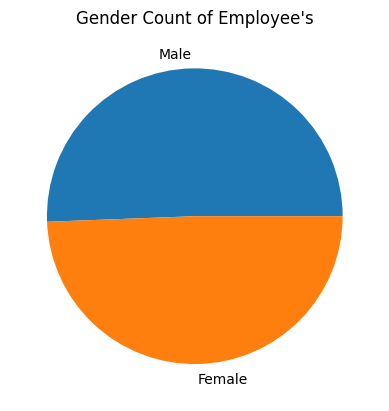

In [12]:
df['Gender'].value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Gender Count of Employee's")
plt.show()

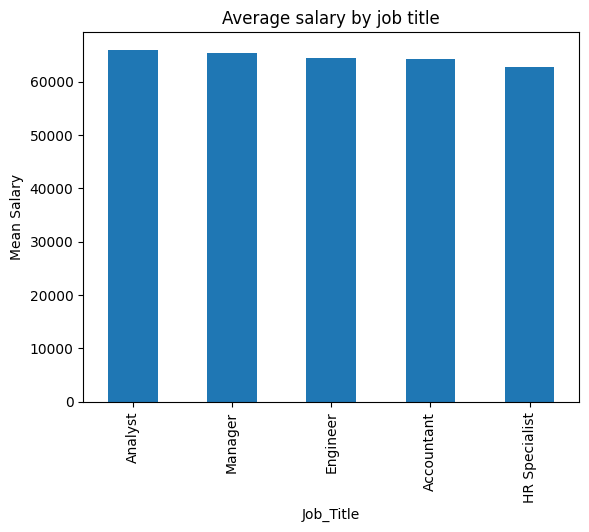

In [13]:
df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average salary by job title")
plt.ylabel("Mean Salary")
plt.show()

In [14]:
df.groupby(["Department", "Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [15]:
df["Salary"].describe()

count     1000.000000
mean     64624.980000
std      20262.984333
min      30099.000000
25%      47613.500000
50%      64525.000000
75%      81921.000000
max      99991.000000
Name: Salary, dtype: float64

In [16]:
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [17]:
X = df[["Years_at_Company", "Satisfaction_Level", "Average_Monthly_Hours"]]
y = df[["Salary"]]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-0.57046707,  0.82217264,  1.27020993],
       [-0.57046707, -1.25193727,  0.8962313 ],
       [-1.27802313,  1.63816732, -1.00765993],
       ...,
       [-1.63180115,  1.0330879 ,  0.14827403],
       [-1.63180115, -0.05498986,  1.27020993],
       [-0.57046707, -0.42596645,  0.38626043]])

In [22]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [23]:
X_test = scaler.fit_transform(X_test)

In [24]:
X_test.shape

(200, 3)

#### ML LinearRegression Model

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
def results(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
predictionslr = lr.predict(X_test)

In [29]:
results(predictionslr)

Mean absolute error on model is 16745.132279326717
Root mean squared error on model is 19565.69343465188


#### ML GridSearchCVR Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [31]:
svrmodel = SVR()

In [32]:
param_gridsvr = {"C" :  [0.01, 0.1, 0.5], "degree": [2,3,4], "kernel":["linear", "rbf", "poly"]}

In [33]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [34]:
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [35]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

In [36]:
predictionssvr = gridsvr.predict(X_test)

In [37]:
results(predictionssvr)

Mean absolute error on model is 16790.42059876775
Root mean squared error on model is 19584.806714053095


#### ML RandomForestRegressor Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [39]:
param_gridrfr = {"n_estimators": [2,3,4,5,6], "max_depth": [5,10,15]}

In [40]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [41]:
gridrfr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [42]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [43]:
predictionsofrfr = gridrfr.predict(X_test)

In [44]:
results(predictionsofrfr)

Mean absolute error on model is 16682.659602069598
Root mean squared error on model is 20128.005326197144


In [45]:
lr

LinearRegression()

#### Export the LinearRegression Model we trained

In [46]:
joblib.dump(lr, "model.pkl")

['model.pkl']

In [47]:
X.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')